In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/bin/bash: nvcc: command not found
torch:  1.11 ; cuda:  1.11.0
detectron2: 0.6


In [15]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from matplotlib import image

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

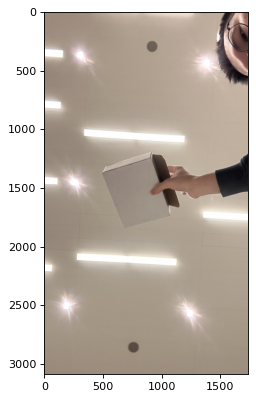

In [22]:
im = image.imread("/Users/xin/Desktop/millimeter wave/code_exp/cloud_point/one_obj.jpg")
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(im)

In [28]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [29]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0, 33])
Boxes(tensor([[ 901.6293, 1182.3027, 1736.3269, 1609.9778],
        [ 516.3857, 1211.9421, 1127.6952, 1846.5986]]))


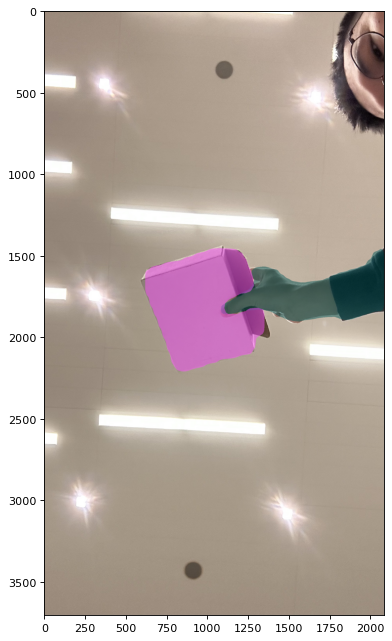

In [31]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

for mask in outputs["instances"].pred_masks.to('cpu'):
    v.draw_soft_mask(mask)
out = v.get_output()

plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(out.get_image()[:, :, ::-1])

In [33]:
np.shape(mask)

torch.Size([3088, 1737])

In [34]:
import skimage.filters

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<ipython-input-43-6226a3722de8>:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  background = skimage.filters.gaussian(im, sigma=(sigma, sigma))


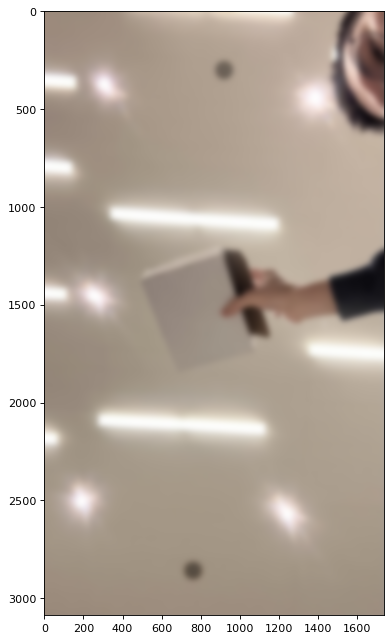

In [43]:
sigma = 15
background = skimage.filters.gaussian(im, sigma=(sigma, sigma))

plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(background)

In [59]:
for mask in outputs["instances"].pred_masks.to('cpu'):
    background[mask] = im[mask]/255

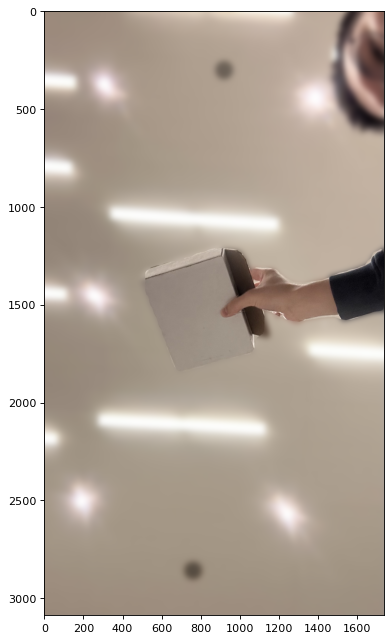

In [60]:
plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(background)